# Property Dataset Analysis
This notebook performs exploratory data analysis (EDA), hypothesis testing, and probability calculations on a property dataset.

## Exploratory Data Analysis (EDA)
The first step is to inspect missing values, outliers, and derive summary statistics.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [101]:
# Check for missing values and derive summary statistics
df = pd.read_csv(r"C:\Users\ankus\OneDrive\Desktop\Hero Vired\Projects\property.csv")
df.isnull().sum()

    

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [71]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [34]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


## Check Missing Values


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Handling Missing Values

<Axes: >

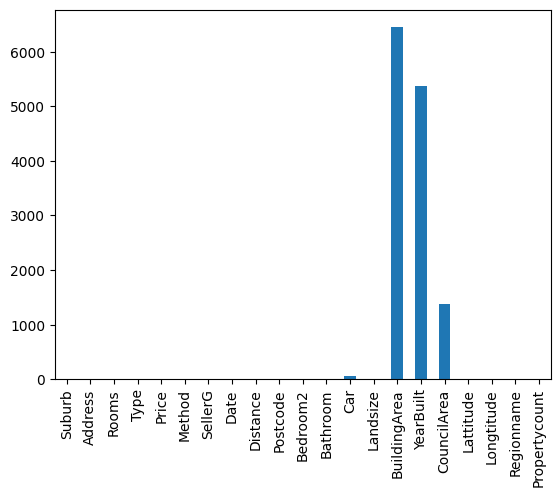

In [67]:
df.isnull().sum().plot(kind = 'bar')

<Axes: xlabel='Car'>

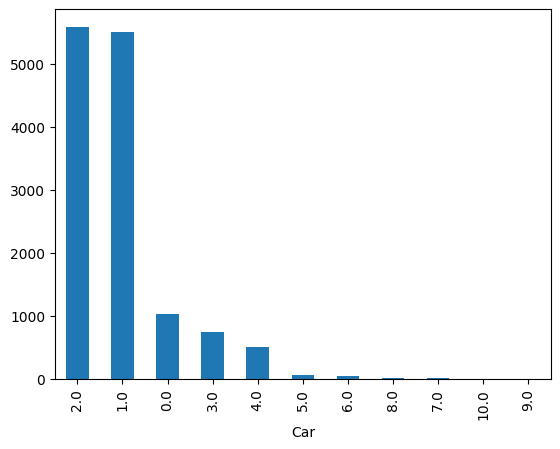

In [69]:
df['Car'].value_counts().plot(kind = 'bar')

<Axes: >

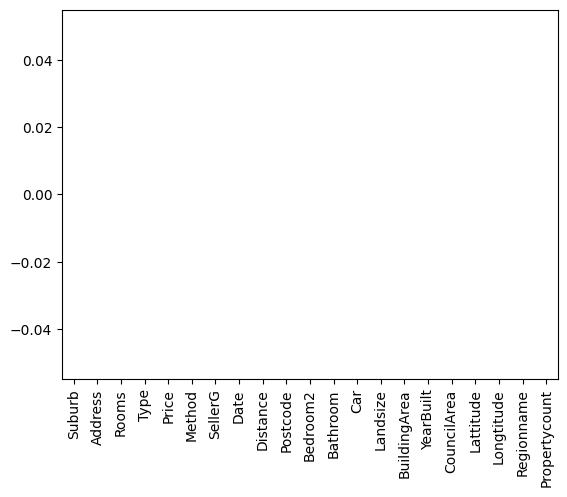

In [83]:
df['Car'] = df['Car'].fillna('2.0')
df.isnull().sum().plot(kind = 'bar')

In [87]:
df=df.fillna(df['BuildingArea'].median())

<Axes: >

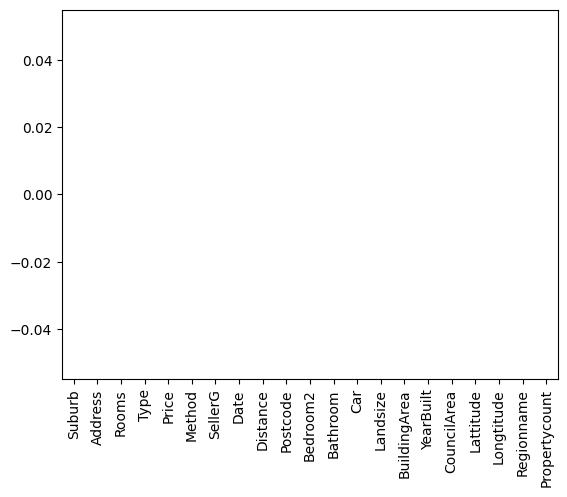

In [85]:
df.isnull().sum().plot(kind = 'bar')

In [89]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  object 
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Duplicate Values

In [94]:
df.duplicated().sum()

0

((array([-3.88559176, -3.66453928, -3.54336491, ...,  3.54336491,
          3.66453928,  3.88559176]),
  array([ 1,  1,  1, ...,  8,  8, 10], dtype=int64)),
 (0.9059807768806528, 2.9379970544919, 0.9477062736131822))

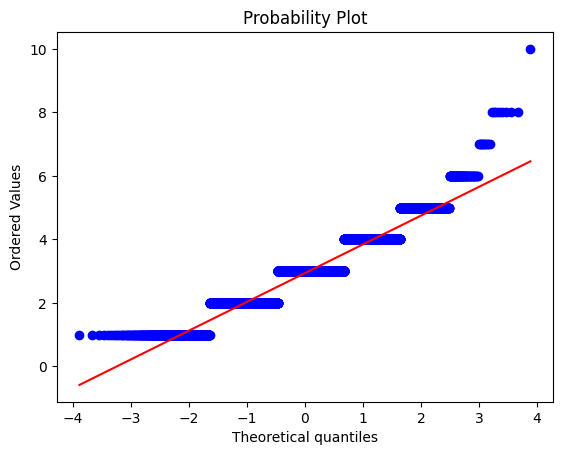

In [103]:
stats.probplot(df['Rooms'], dist='norm', plot=plt)

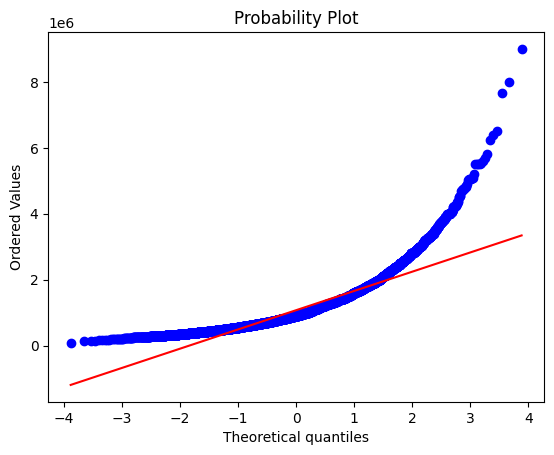

In [105]:
stats.probplot(df['Price'], dist='norm', plot=plt)
plt.show()

## Removing Outliers
Using the IQR method to identify and remove outliers in the `Price` column.

<Axes: xlabel='Price'>

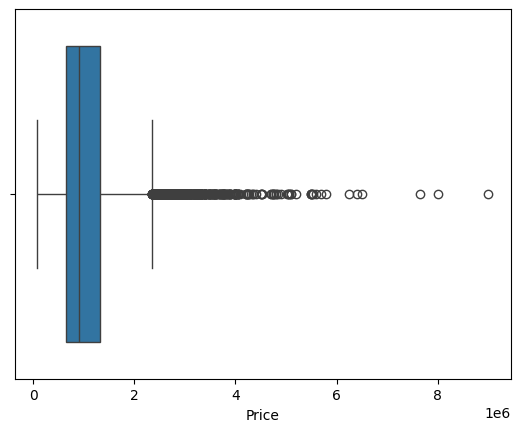

In [107]:
sns.boxplot(data=df, x=df['Price'])

-370000.0
2350000.0


<Axes: xlabel='Price'>

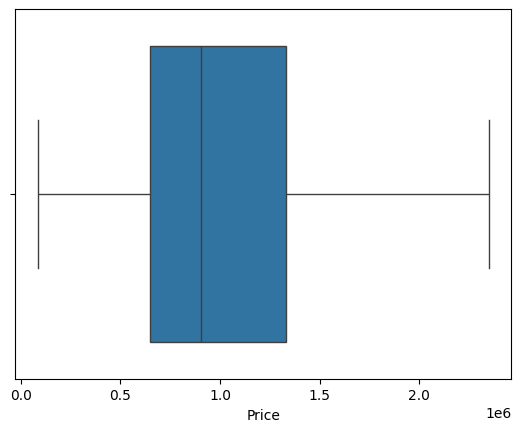

In [109]:
# Remove outliers using IQR method
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Price']=np.where(df['Price']>upper_bound,upper_bound,df['Price'])
df['Price']=np.where(df['Price']<lower_bound,lower_bound,df['Price'])

sns.boxplot(data=df, x=df['Price'])
    

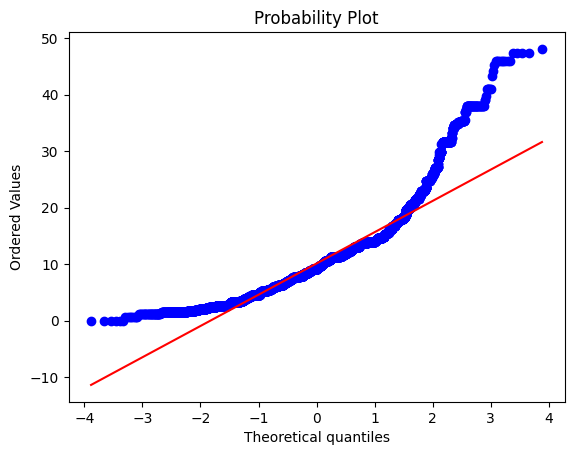

In [111]:
stats.probplot(df['Distance'], dist='norm', plot=plt)
plt.show()

<Axes: xlabel='Distance'>

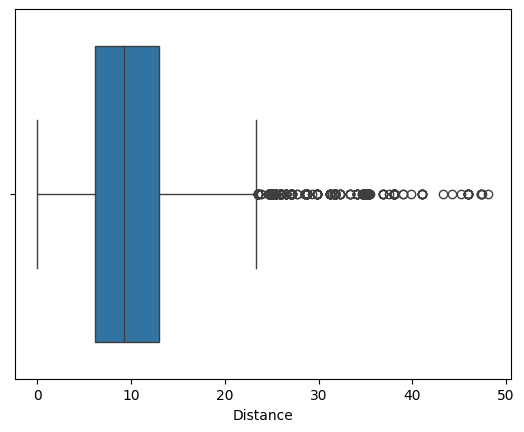

In [113]:
#Boxplot for Distance variables before handling the outliers-
sns.boxplot(data=df, x=df['Distance'])

-4.250000000000002
23.35


<Axes: xlabel='Distance'>

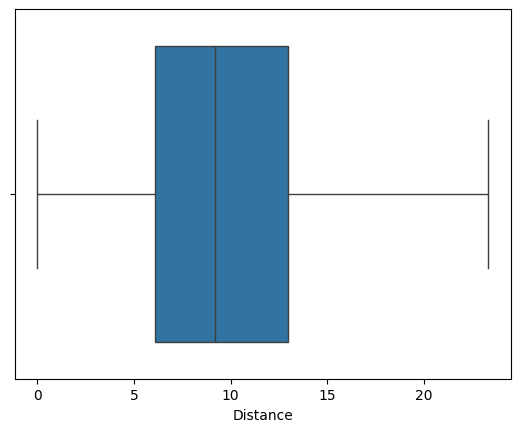

In [115]:
Q1=df['Distance'].quantile(0.25)
Q3=df['Distance'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Distance']=np.where(df['Distance']>upper_bound,upper_bound,df['Distance'])
df['Distance']=np.where(df['Distance']<lower_bound,lower_bound,df['Distance'])

sns.boxplot(data=df, x=df['Distance'])

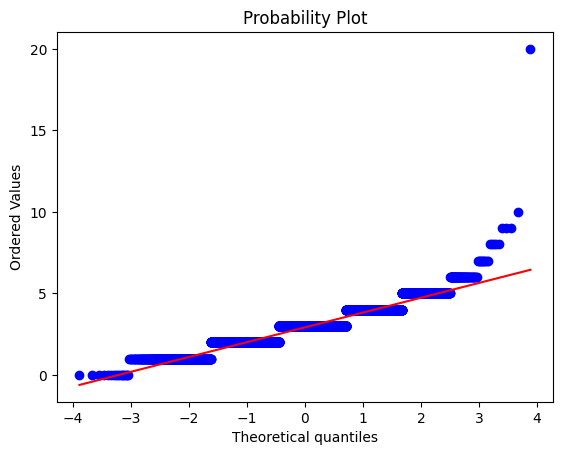

In [117]:
stats.probplot(df['Bedroom2'], dist='norm', plot=plt)
plt.show()

<Axes: xlabel='Bathroom'>

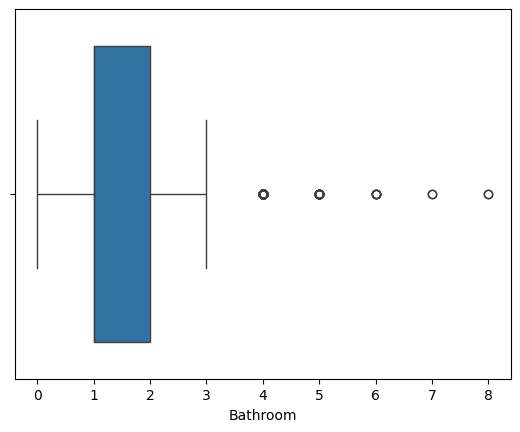

In [123]:
sns.boxplot(data=df, x=df['Bathroom'])

-0.5
3.5


<Axes: xlabel='Bathroom'>

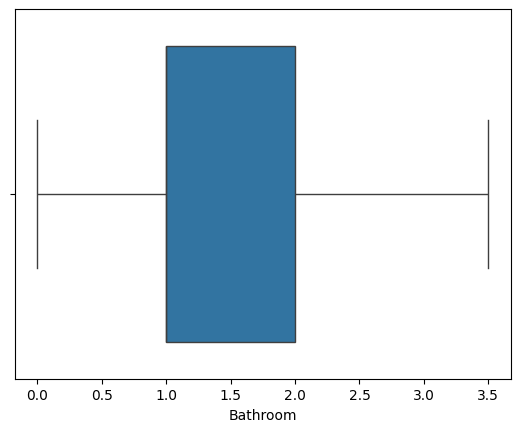

In [129]:
Q1=df['Bathroom'].quantile(0.25)
Q3=df['Bathroom'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Bathroom']=np.where(df['Bathroom']>upper_bound,upper_bound,df['Bathroom'])
df['Bathroom']=np.where(df['Bathroom']<lower_bound,lower_bound,df['Bathroom'])

sns.boxplot(data=df, x=df['Bathroom'])

<Axes: xlabel='Car'>

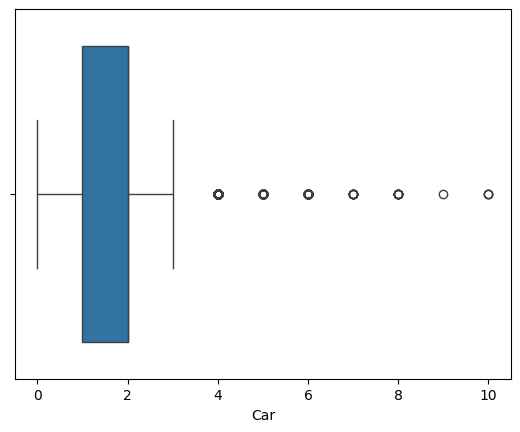

In [125]:
sns.boxplot(data=df, x=df['Car'])

-0.5
3.5


<Axes: xlabel='Car'>

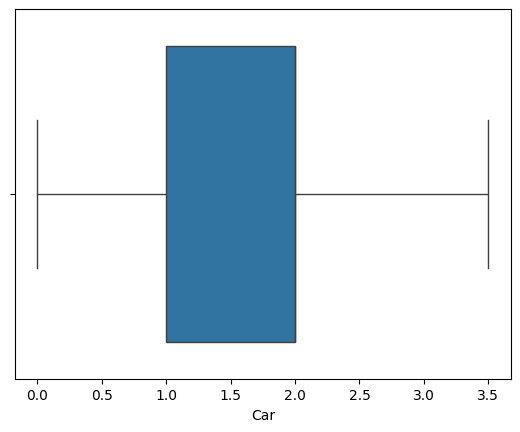

In [127]:
Q1=df['Car'].quantile(0.25)
Q3=df['Car'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Car']=np.where(df['Car']>upper_bound,upper_bound,df['Car'])
df['Car']=np.where(df['Car']<lower_bound,lower_bound,df['Car'])

sns.boxplot(data=df, x=df['Car'])

<Axes: xlabel='Landsize'>

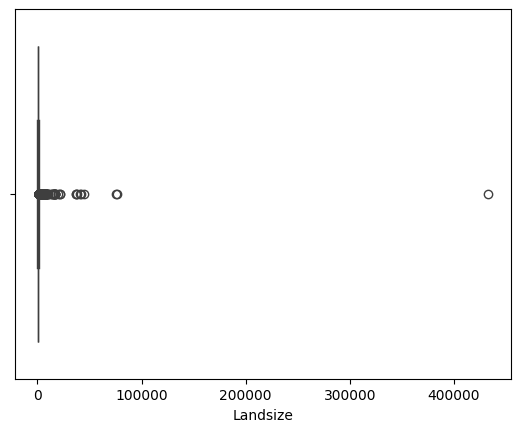

In [131]:
#Boxplot for Landsize variables before handling the outliers-
sns.boxplot(data=df, x=df['Landsize'])

-534.0
1362.0


<Axes: xlabel='Landsize'>

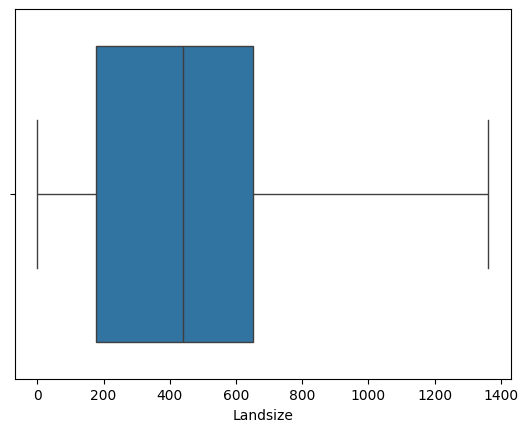

In [133]:
Q1=df['Landsize'].quantile(0.25)
Q3=df['Landsize'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Landsize']=np.where(df['Landsize']>upper_bound,upper_bound,df['Landsize'])
df['Landsize']=np.where(df['Landsize']<lower_bound,lower_bound,df['Landsize'])

sns.boxplot(data=df, x=df['Landsize'])

<Axes: xlabel='BuildingArea'>

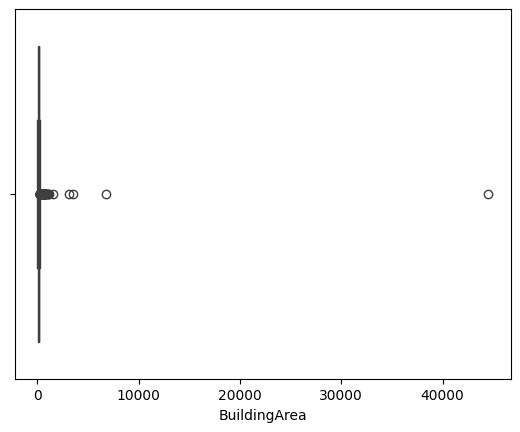

In [135]:
sns.boxplot(data=df, x=df['BuildingArea'])

-28.5
295.5


<Axes: xlabel='BuildingArea'>

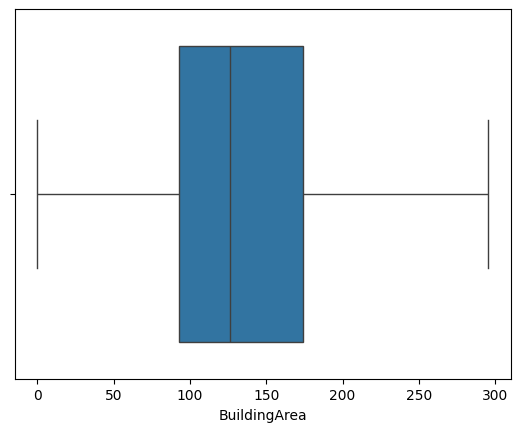

In [137]:
Q1=df['BuildingArea'].quantile(0.25)
Q3=df['BuildingArea'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['BuildingArea']=np.where(df['BuildingArea']>upper_bound,upper_bound,df['BuildingArea'])
df['BuildingArea']=np.where(df['BuildingArea']<lower_bound,lower_bound,df['BuildingArea'])

sns.boxplot(data=df, x=df['BuildingArea'])

<Axes: xlabel='Propertycount'>

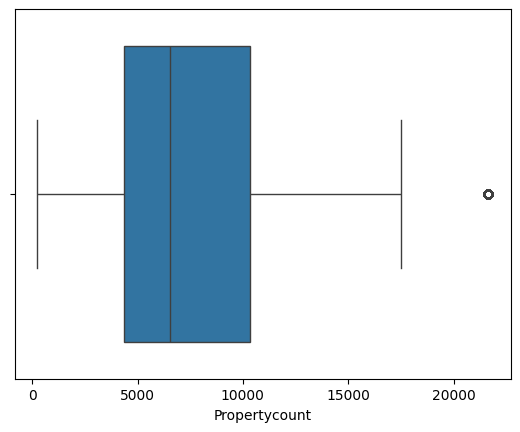

In [139]:
#Boxplot for BuildingArea variables before handling the outliers-
sns.boxplot(data=df, x=df['Propertycount'])

-4546.5
19257.5


<Axes: xlabel='Propertycount'>

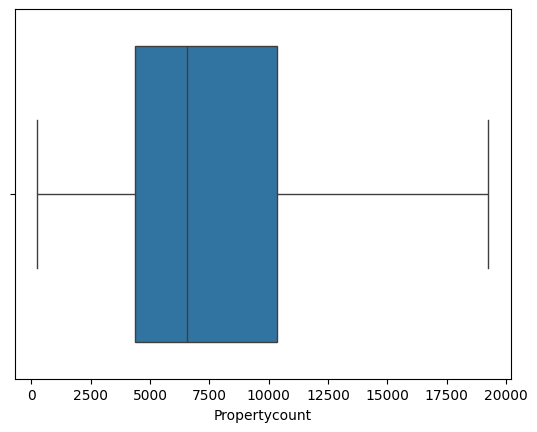

In [141]:
Q1=df['Propertycount'].quantile(0.25)
Q3=df['Propertycount'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Propertycount']=np.where(df['Propertycount']>upper_bound,upper_bound,df['Propertycount'])
df['Propertycount']=np.where(df['Propertycount']<lower_bound,lower_bound,df['Propertycount'])

sns.boxplot(data=df, x=df['Propertycount'])

<Axes: xlabel='Propertycount'>

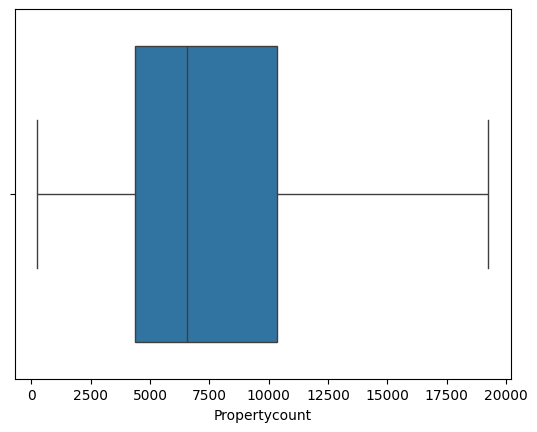

In [143]:
sns.boxplot(data=df, x=df['Propertycount'])

# With the cleaned dataset, Let's proceed with the specific Hypothesis testing and Probability calculations as outlined in your request:

## Altona Property Price Hypothesis Test

### Hypothesis:

- $Null Hypothesis$: 800000 is the typical property price in Altona is .
- $Alternative Hypothesis$: The typical property price in Altona has increased from 800000.

Significance Level : 5% (0.05)

### Steps:
- Extract data for the suburb Altona.
- Conduct a one-sample t-test because we are comparing the mean of a single sample (Altona's property prices) to a known value ($800,000).
- Plot the distribution of property prices in Altona to visually inspect the data.

### Why a T-Test?
A t-test is used because we are comparing a sample mean to a hypothesized population mean and want to determine if the observed data significantly differs from the hypothesized value.

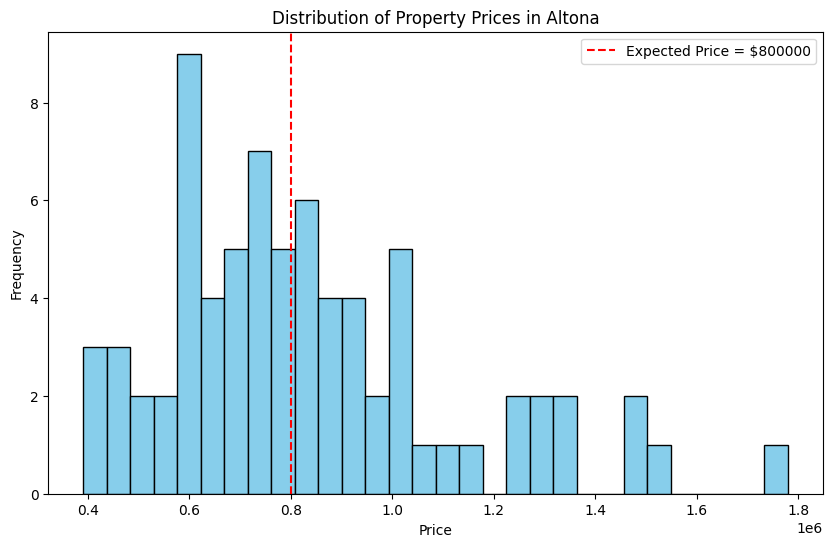

Altona Mean Price: 834830.4054054054
T-statistic: 1.0277020770199676, P-value: 0.307483271305555


In [203]:
from scipy import stats

# Suburb 'Altona' data
altona_data = df[df['Suburb'] == 'Altona']['Price']

# Hypothesis testing
hypothesized_price = 800000
t_stat, p_value = stats.ttest_1samp(altona_data, hypothesized_price)

# Plotting the distribution of property prices in Altona
plt.figure(figsize=(10, 6))
plt.hist(altona_data, bins=30, color='skyblue', edgecolor='black')
plt.axvline(hypothesized_price, color='red', linestyle='--', label=f'Expected Price = ${hypothesized_price}')
plt.title('Distribution of Property Prices in Altona')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Displaying results
mean_price_altona = altona_data.mean()
print(f"Altona Mean Price: {mean_price_altona}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")


- $T-statistic$: Measures the difference between the sample mean and the hypothesized value ($800,000$), adjusted for sample size and variability.
- $P-value$: The probability of obtaining a result as extreme as the observed one, assuming the null hypothesis is true.
- If the p-value is less than 0.05, we reject the null hypothesis and conclude that the typical price has increased.
- If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no sufficient evidence that the price has increased.
- $Graph$ : The histogram provides a visual representation of property prices in Altona. The red dashed line indicates the hypothesized price of $800,000.


## Price Comparison Between Summer and Winter in 2016
## Hypothesis:

- $Null Hypothesis$: There is no significant difference in property prices between summer and winter months in 2016.
- $Alternative Hypothesis$: There is a significant difference in property prices between summer and winter months in 2016.

Significance Level : 5% (0.05)

### Steps:
- Extract data for the year 2016.
- Define the summer months (April to September) and winter months (October to March).
- Conduct an independent t-test because we are comparing the means of two independent groups (summer vs winter prices).
- Plot the boxplot to compare prices in summer vs winter.

### Why a T-Test?
An independent t-test is appropriate because we are comparing the means of two independent groups (summer and winter), and we want to see if the difference in their means is statistically significant.

C:\Users\ankus\AppData\Local\Temp\ipykernel_23148\3379139963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Month'] = df_2016['Date'].str[3:5]
C:\Users\ankus\AppData\Local\Temp\ipykernel_23148\3379139963.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([winter_data.dropna(), summer_data.dropna()], labels=['Winter', 'Summer'])


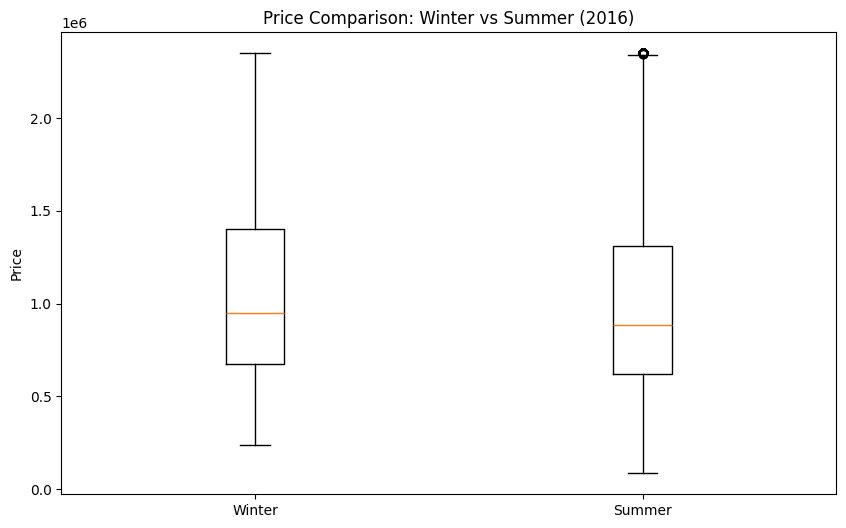

Winter Mean Price: 1095986.0635950682
Summer Mean Price: 1021238.1509906152
T-statistic: 4.658388185554088, P-value: 3.35331507378679e-06


In [207]:
# Extracting data for the year 2016
df_2016 = df[df['Date'].str.contains('2016')]

# Define winter months (October to March)
df_2016['Month'] = df_2016['Date'].str[3:5]
winter_months = ['10', '11', '12', '01', '02', '03']

# Split into winter and summer data
winter_data = df_2016[df_2016['Month'].isin(winter_months)]['Price']
summer_data = df_2016[~df_2016['Month'].isin(winter_months)]['Price']

# Perform an independent t-test
t_stat_2016, p_value_2016 = stats.ttest_ind(winter_data, summer_data, equal_var=False)

# Boxplot to visualize price comparison
plt.figure(figsize=(10, 6))
plt.boxplot([winter_data.dropna(), summer_data.dropna()], labels=['Winter', 'Summer'])
plt.title('Price Comparison: Winter vs Summer (2016)')
plt.ylabel('Price')
plt.show()

# Displaying results
mean_winter = winter_data.mean()
mean_summer = summer_data.mean()

print(f"Winter Mean Price: {mean_winter}")
print(f"Summer Mean Price: {mean_summer}")
print(f"T-statistic: {t_stat_2016}, P-value: {p_value_2016}")


- $T-statistic$: Reflects the difference between the average prices in summer and winter, accounting for variability.
- $P-value$: The probability of observing such a difference under the assumption that the prices are the same in both periods.
- If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in prices.
- If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no significant difference between summer and winter prices.
- $Graph$: The boxplot helps visualize the price distribution in winter and summer months. If the boxes overlap significantly, it suggests that the prices are similar; otherwise, they differ.

## Probability: 3 out of 10 Abbotsford Properties Without Car Parking
We need to calculate the probability that exactly 3 out of 10 properties in Abbotsford will not have car parking. This is a binomial probability problem.

## Steps:
- Calculate the probability of a property in Abbotsford not having car parking (p).
- Use the binomial distribution formula to calculate the probability that exactly 3 out of 10 properties do not have car parking.


In [212]:
# Suburb 'Abbotsford' data
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

# Calculate the probability of not having car parking
no_car_probability = (abbotsford_data['Car'] == 0).mean()

# Binomial probability: 3 out of 10 properties
n = 10  # Total properties
k = 3   # Number of properties without car parking

# Calculate binomial probability
binomial_prob = stats.binom.pmf(k, n, no_car_probability)

print(f"Probability of 3 out of 10 properties without car parking: {round(binomial_prob, 3)}")


Probability of 3 out of 10 properties without car parking: 0.26


- $No car probability $ : This is calculated based on the fraction of properties in Abbotsford without car parking.
- $Binomial Probability$ : The chance of exactly 3 out of 10 properties not having car parking.

## Probability: Finding a Property with 3 Rooms in Abbotsford

### Steps:
- Calculate the proportion of properties with 3 rooms in Abbotsford.
- This is a simple probability calculation based on the proportion of 3-room properties in the suburb.

In [216]:
# Probability of finding a property with 3 rooms in Abbotsford
three_rooms_probability = (abbotsford_data['Rooms'] == 3).mean()

print(f"Probability of finding a property with 3 rooms: {round(three_rooms_probability, 3)}")


Probability of finding a property with 3 rooms: 0.357


## Probability: Finding a Property with 2 Bathrooms in Abbotsford
### Steps:
- Calculate the proportion of properties with 2 bathrooms in Abbotsford.
- This is a simple probability calculation based on the proportion of 2-bathroom properties in the suburb.

In [219]:
# Probability of finding a property with 2 bathrooms in Abbotsford
two_bathrooms_probability = (abbotsford_data['Bathroom'] == 2).mean()

print(f"Probability of finding a property with 2 bathrooms: {round(two_bathrooms_probability, 3)}")


Probability of finding a property with 2 bathrooms: 0.339


## Conclusion:
Each question was approached with the appropriate statistical test or probability calculation:

- T-tests were used to test whether property prices in Altona have increased and whether prices differ between summer and winter.
- Binomial probability was used to calculate the likelihood of 3 out of 10 properties not having car parking.
- Simple probability calculations were done for properties with 3 rooms and 2 bathrooms.
- Visual aids such as histograms and boxplots were included to support the analysis.